In [100]:
# Web scraping, pickle imports
import matplotlib
import requests
from bs4 import BeautifulSoup
import pickle
from urllib.request import urlopen

def url_to_transcript(url):
    
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all(class_="songLyricsV14 iComment-text")]
    print(url)
    return text

In [101]:
# URLs of transcripts in scope
urls =['http://www.songlyrics.com/katharine-mcphee/what-are-you-doing-new-year-s-eve-lyrics/',
       'http://www.songlyrics.com/jonathan-cain-neal-schon-steve-perry-world-olympics-pops-orchestra-sara-du-lala-violin-simon-lugge-violin-t-elliot-cello-tom-furbirger-piano-johann-heinrich-jr/don-t-stop-believin-lyrics/',
       'http://www.songlyrics.com/firework-masters/firework-salute-to-katy-perry-lyrics/',
       'http://www.songlyrics.com/u2/new-year-s-day-remastered-lyrics/',
       'http://www.songlyrics.com/new-year-s-eve-fx-sounds/new-year-s-eve-countdown-with-fireworks-lyrics/',
       'http://www.songlyrics.com/three-dog-night/joy-to-the-world-three-dog-night-lyrics/',
       'http://www.songlyrics.com/prince/1999-lyrics/',
       'http://www.songlyrics.com/bing-crosby/let-s-start-the-new-year-right-remastered-lyrics/',
       'http://www.songlyrics.com/the-breeders/new-year-demo-lyrics/']

# singer names
singers = ['Katharine McPhee','Jonathan Cain','Katy Perry','U2','New Years Eve FX Sounds','Three Dog Night','Prince','Bing Crosby','The Breeders']


In [102]:
transcripts = [url_to_transcript(u) for u in urls]

http://www.songlyrics.com/katharine-mcphee/what-are-you-doing-new-year-s-eve-lyrics/
http://www.songlyrics.com/jonathan-cain-neal-schon-steve-perry-world-olympics-pops-orchestra-sara-du-lala-violin-simon-lugge-violin-t-elliot-cello-tom-furbirger-piano-johann-heinrich-jr/don-t-stop-believin-lyrics/
http://www.songlyrics.com/firework-masters/firework-salute-to-katy-perry-lyrics/
http://www.songlyrics.com/u2/new-year-s-day-remastered-lyrics/
http://www.songlyrics.com/new-year-s-eve-fx-sounds/new-year-s-eve-countdown-with-fireworks-lyrics/
http://www.songlyrics.com/three-dog-night/joy-to-the-world-three-dog-night-lyrics/
http://www.songlyrics.com/prince/1999-lyrics/
http://www.songlyrics.com/bing-crosby/let-s-start-the-new-year-right-remastered-lyrics/
http://www.songlyrics.com/the-breeders/new-year-demo-lyrics/


In [103]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(singers):
     with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [104]:
data = {}
for i, c in enumerate(singers):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [105]:
data.keys()


dict_keys(['Katharine McPhee', 'Jonathan Cain', 'Katy Perry', 'U2', 'New Years Eve FX Sounds', 'Three Dog Night', 'Prince', 'Bing Crosby', 'The Breeders'])

In [106]:
data['Katharine McPhee'][:4]


["Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's much too early in the game\nOoh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nWonder whose arms will hold you good and tight\nWhen it's exactly twelve o'clock that night\nWelcoming in the New Year\nNew Year's eve\n\nMaybe I'm crazy to suppose\nI'd ever be the one you chose\nOut of a thousand invitations\nThat you'd receive\n\nOoh, but in case I stand one little chance\nHere comes the jackpot question in advance\nWhat are you doing New Year's\nNew Year's Eve?\n\nThe bells all ring and the horns all blow\nOh, come on baby 'cause I need to know\nWill I be spending New Year's with you, yeah\n\nMaybe it's much too early in the game\nOoh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's?\n\nWonder whose arms will hold you good and tight\nWhen it's exactly twelve o'cloc

In [107]:
next(iter(data.keys()))


'Katharine McPhee'

In [108]:
next(iter(data.values()))


["Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's much too early in the game\nOoh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nWonder whose arms will hold you good and tight\nWhen it's exactly twelve o'clock that night\nWelcoming in the New Year\nNew Year's eve\n\nMaybe I'm crazy to suppose\nI'd ever be the one you chose\nOut of a thousand invitations\nThat you'd receive\n\nOoh, but in case I stand one little chance\nHere comes the jackpot question in advance\nWhat are you doing New Year's\nNew Year's Eve?\n\nThe bells all ring and the horns all blow\nOh, come on baby 'cause I need to know\nWill I be spending New Year's with you, yeah\n\nMaybe it's much too early in the game\nOoh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's?\n\nWonder whose arms will hold you good and tight\nWhen it's exactly twelve o'cloc

In [109]:
# We are going to change this to key: singer, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [110]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [111]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150) 

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m..."
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos..."
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke..."
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE..."
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ..."


In [112]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [113]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Bing Crosby,bing crosbybob crosby orchestra\n\npeaked billboard position in \n\none minute to midnight\none minute to go\none minute to say goodbye\nbefore w...
Jonathan Cain,ust a small town girl\nlivin in a lonely world\nshe took the midnight train\ngoin anywhere\njust a city boy\nborn and raised in south detroit\nhe ...
Katharine McPhee,maybe its much too early in the game\noh but i thought id ask you just the same\nwhat are you doing new years\nnew years eve\n\nbaby its much too ...
Katy Perry,do you ever feel like a plastic bag\ndrifting thourgh the wind\nwanting to start again\ndo you ever feel feel so paper thin\nlike a house of cards...
New Years Eve FX Sounds,yo ive seen a lot of niggas\nso when them niggas start talkin reckless i get offended i get it\nthey try to keep an image but look real closely\na...
Prince,dont worry i wont hurt you\ni only want you to have some fun\ni was dreamin when i wrote this\nforgive me if it goes astray\n\nbut when i woke up ...
The Breeders,we have come for light\nwholly we have come for light\nits true\ni am the sun\ni am the new year\ni am the rain\n\ni am the sun\ni am the new year...
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...
U2,yeah\n\nall is quiet on new years day\na world in white gets underway\ni want to be with you be with you night and day\nnothing changes on new yea...


In [114]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [115]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
Bing Crosby,bing crosbybob crosby orchestra peaked billboard position in one minute to midnight one minute to go one minute to say goodbye before we say h...
Jonathan Cain,ust a small town girl livin in a lonely world she took the midnight train goin anywhere just a city boy born and raised in south detroit he took t...
Katharine McPhee,maybe its much too early in the game oh but i thought id ask you just the same what are you doing new years new years eve baby its much too early...
Katy Perry,do you ever feel like a plastic bag drifting thourgh the wind wanting to start again do you ever feel feel so paper thin like a house of cards one...
New Years Eve FX Sounds,yo ive seen a lot of niggas so when them niggas start talkin reckless i get offended i get it they try to keep an image but look real closely at t...
Prince,dont worry i wont hurt you i only want you to have some fun i was dreamin when i wrote this forgive me if it goes astray but when i woke up this ...
The Breeders,we have come for light wholly we have come for light its true i am the sun i am the new year i am the rain i am the sun i am the new year i am th...
Three Dog Night,jeramiah was a bullfrog was a good friend of mine never understood a single word he said but i helped him drink his wine and he always had mighty ...
U2,yeah all is quiet on new years day a world in white gets underway i want to be with you be with you night and day nothing changes on new years da...


In [116]:
# Let's take a look at our dataframe
data_df

,transcript
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m..."
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos..."
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke..."
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE..."
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ..."


In [117]:
# Let's add the singers' song as well
song = ['Katharine McPhee','Jonathan Cain','Katy Perry','U2','New Years Eve FX Sounds','Three Dog Night','Prince','Bing Crosby','The Breeders']

data_df['song'] = singer
data_df

,transcript,song
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...,U2
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...,U2
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m...",U2
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...,U2
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos...",U2
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke...",U2
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE...",U2
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...,U2
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ...",U2


In [118]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [119]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,adore,advance,age,ah,aint,albums,alright,antigolf,architect,aringin,...,wrote,xanax,yall,yeah,year,years,yo,youd,youre,zero
Bing Crosby,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,0
Jonathan Cain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Katharine McPhee,0,2,0,0,0,0,0,0,0,0,...,0,0,0,4,2,13,0,2,0,0
Katy Perry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New Years Eve FX Sounds,1,0,0,0,2,1,0,1,1,0,...,0,1,4,0,0,1,1,0,0,0
Prince,0,0,0,1,0,0,1,0,0,1,...,2,0,1,8,0,0,0,0,1,10
The Breeders,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
Three Dog Night,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,6,0,0,0,0


In [120]:

# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [121]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [122]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Bing Crosby,Jonathan Cain,Katharine McPhee,Katy Perry,New Years Eve FX Sounds,Prince,The Breeders,Three Dog Night,U2
adore,0,0,0,0,1,0,0,0,0
advance,0,0,2,0,0,0,0,0,0
age,0,0,0,0,0,0,0,0,1
ah,0,0,0,0,0,1,0,0,0
aint,0,0,0,0,2,0,0,0,0


In [123]:
# Find the top 30 words sung by each singer
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Bing Crosby': [('year', 7),
  ('new', 4),
  ('lets', 4),
  ('old', 3),
  ('goodbye', 3),
  ('start', 3),
  ('right', 3),
  ('minute', 3),
  ('die', 2),
  ('fond', 2),
  ('watch', 2),
  ('hopes', 2),
  ('kissing', 2),
  ('kite', 2),
  ('high', 2),
  ('love', 2),
  ('wrong', 2),
  ('say', 2),
  ('oclock', 1),
  ('position', 1),
  ('orchestra', 1),
  ('dim', 1),
  ('hello', 1),
  ('light', 1),
  ('bing', 1),
  ('billboard', 1),
  ('begin', 1),
  ('peaked', 1),
  ('crosbybob', 1),
  ('midnight', 1)],
 'Jonathan Cain': [('streetlight', 5),
  ('people', 5),
  ('night', 5),
  ('just', 4),
  ('livin', 3),
  ('hold', 3),
  ('believin', 3),
  ('dont', 3),
  ('stop', 3),
  ('emotion', 2),
  ('shadows', 2),
  ('searching', 2),
  ('train', 2),
  ('took', 2),
  ('feelin', 2),
  ('hidin', 2),
  ('goin', 2),
  ('midnight', 2),
  ('goes', 2),
  ('boulevard', 2),
  ('strangers', 2),
  ('waiting', 2),
  ('born', 2),
  ('small', 1),
  ('town', 1),
  ('smile', 1),
  ('movie', 1),
  ('boy', 1),
  ('smell'

In [124]:
# Print the top 15 words sung by each singer
for singer, top_words in top_dict.items():
    print(singer)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Bing Crosby
year, new, lets, old, goodbye, start, right, minute, die, fond, watch, hopes, kissing, kite
---
Jonathan Cain
streetlight, people, night, just, livin, hold, believin, dont, stop, emotion, shadows, searching, train, took
---
Katharine McPhee
new, years, doing, eve, id, maybe, ooh, oh, yeah, early, thought, game, just, ask
---
Katy Perry
feel, like, just, theres, cause, scream, cards, july, caving, blow, wanting, spark, firework, night
---
New Years Eve FX Sounds
niggas, nigga, fuck, dont, like, cause, im, motherfucking, yall, got, think, didnt, child, thats
---
Prince
party, say, gonna, zero, im, yeah, time, everybody, dont, tonight, like, oops, oh, come
---
The Breeders
new, year, rain, sun, way, light, true, home, come, im, wholly, girl, gold, gets
---
Three Dog Night
joy, world, boys, sea, blue, deep, girls, fishes, id, love, said, gun, straight, son
---
U2
day, new, years, night, maybe, oh, want, white, changes, begin, says, true, torn, tonight
---


In [125]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each singer
words = []
for singer in data.columns:
    top = [word for (word, count) in top_dict[singer]]
    for t in top:
        words.append(t)
        
words

['year',
 'new',
 'lets',
 'old',
 'goodbye',
 'start',
 'right',
 'minute',
 'die',
 'fond',
 'watch',
 'hopes',
 'kissing',
 'kite',
 'high',
 'love',
 'wrong',
 'say',
 'oclock',
 'position',
 'orchestra',
 'dim',
 'hello',
 'light',
 'bing',
 'billboard',
 'begin',
 'peaked',
 'crosbybob',
 'midnight',
 'streetlight',
 'people',
 'night',
 'just',
 'livin',
 'hold',
 'believin',
 'dont',
 'stop',
 'emotion',
 'shadows',
 'searching',
 'train',
 'took',
 'feelin',
 'hidin',
 'goin',
 'midnight',
 'goes',
 'boulevard',
 'strangers',
 'waiting',
 'born',
 'small',
 'town',
 'smile',
 'movie',
 'boy',
 'smell',
 'smokey',
 'new',
 'years',
 'doing',
 'eve',
 'id',
 'maybe',
 'ooh',
 'oh',
 'yeah',
 'early',
 'thought',
 'game',
 'just',
 'ask',
 'come',
 'night',
 'invitations',
 'jackpot',
 'question',
 'thousand',
 'oclock',
 'tight',
 'hold',
 'chance',
 'stand',
 'good',
 'chose',
 'crazy',
 'suppose',
 'case',
 'feel',
 'like',
 'just',
 'theres',
 'cause',
 'scream',
 'cards',
 '

In [126]:

# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('new', 4),
 ('night', 4),
 ('right', 3),
 ('love', 3),
 ('say', 3),
 ('light', 3),
 ('just', 3),
 ('dont', 3),
 ('oh', 3),
 ('come', 3),
 ('good', 3),
 ('like', 3),
 ('im', 3),
 ('got', 3),
 ('year', 2),
 ('goodbye', 2),
 ('start', 2),
 ('die', 2),
 ('high', 2),
 ('oclock', 2),
 ('begin', 2),
 ('midnight', 2),
 ('people', 2),
 ('hold', 2),
 ('goin', 2),
 ('goes', 2),
 ('years', 2),
 ('id', 2),
 ('maybe', 2),
 ('yeah', 2),
 ('game', 2),
 ('chance', 2),
 ('cause', 2),
 ('deep', 2),
 ('gotta', 2),
 ('thats', 2),
 ('want', 2),
 ('everybody', 2),
 ('golf', 2),
 ('gonna', 2),
 ('time', 2),
 ('tonight', 2),
 ('day', 2),
 ('true', 2),
 ('girl', 2),
 ('gets', 2),
 ('gathered', 2),
 ('girls', 2),
 ('lets', 1),
 ('old', 1),
 ('minute', 1),
 ('fond', 1),
 ('watch', 1),
 ('hopes', 1),
 ('kissing', 1),
 ('kite', 1),
 ('wrong', 1),
 ('position', 1),
 ('orchestra', 1),
 ('dim', 1),
 ('hello', 1),
 ('bing', 1),
 ('billboard', 1),
 ('peaked', 1),
 ('crosbybob', 1),
 ('streetlight', 1),
 ('livin', 1),


In [127]:
# If more than half of the singers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [131]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [132]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

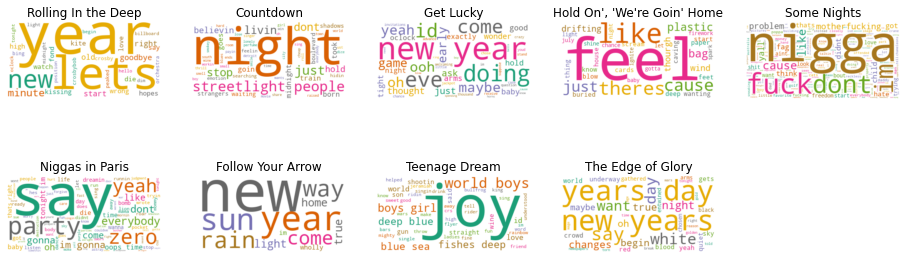

In [133]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

song = ['Rolling In the Deep', 'Countdown','Get Lucky','Hold On\', \'We\'re Goin\' Home','Some Nights','Niggas in Paris',
              'Follow Your Arrow','Teenage Dream', 'The Edge of Glory','Adorn',' We Can\'\t Stop',
              'Super Bass',' We Found Love','Dancing On My Own','Chandelier' ]

# Create subplots for each singer
for index, singer in enumerate(data.columns):
    wc.generate(data_clean.transcript[singer])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(song[index])
    
plt.show()

In [137]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('new', 4),
 ('night', 4),
 ('right', 3),
 ('love', 3),
 ('say', 3),
 ('light', 3),
 ('just', 3),
 ('dont', 3),
 ('oh', 3),
 ('come', 3),
 ('good', 3),
 ('like', 3),
 ('im', 3),
 ('got', 3),
 ('year', 2),
 ('goodbye', 2),
 ('start', 2),
 ('die', 2),
 ('high', 2),
 ('oclock', 2),
 ('begin', 2),
 ('midnight', 2),
 ('people', 2),
 ('hold', 2),
 ('goin', 2),
 ('goes', 2),
 ('years', 2),
 ('id', 2),
 ('maybe', 2),
 ('yeah', 2),
 ('game', 2),
 ('chance', 2),
 ('cause', 2),
 ('deep', 2),
 ('gotta', 2),
 ('thats', 2),
 ('want', 2),
 ('everybody', 2),
 ('golf', 2),
 ('gonna', 2),
 ('time', 2),
 ('tonight', 2),
 ('day', 2),
 ('true', 2),
 ('girl', 2),
 ('gets', 2),
 ('gathered', 2),
 ('girls', 2),
 ('lets', 1),
 ('old', 1),
 ('minute', 1),
 ('fond', 1),
 ('watch', 1),
 ('hopes', 1),
 ('kissing', 1),
 ('kite', 1),
 ('wrong', 1),
 ('position', 1),
 ('orchestra', 1),
 ('dim', 1),
 ('hello', 1),
 ('bing', 1),
 ('billboard', 1),
 ('peaked', 1),
 ('crosbybob', 1),
 ('streetlight', 1),
 ('livin', 1),


In [138]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,song
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...,U2
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...,U2
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m...",U2
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...,U2
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos...",U2
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke...",U2
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE...",U2
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...,U2
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ...",U2


In [144]:

# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,song
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...,U2
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...,U2
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m...",U2
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...,U2
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos...",U2
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke...",U2
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE...",U2
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...,U2
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ...",U2


In [146]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,song,polarity,subjectivity
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...,U2,0.140144,0.516962
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...,U2,0.124722,0.401944
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m...",U2,0.046306,0.404449
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...,U2,0.150000,0.737500
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos...",U2,-0.035534,0.642576
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke...",U2,0.304797,0.480225
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE...",U2,0.255682,0.564773
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...,U2,0.479908,0.286621
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ...",U2,0.108577,0.370603


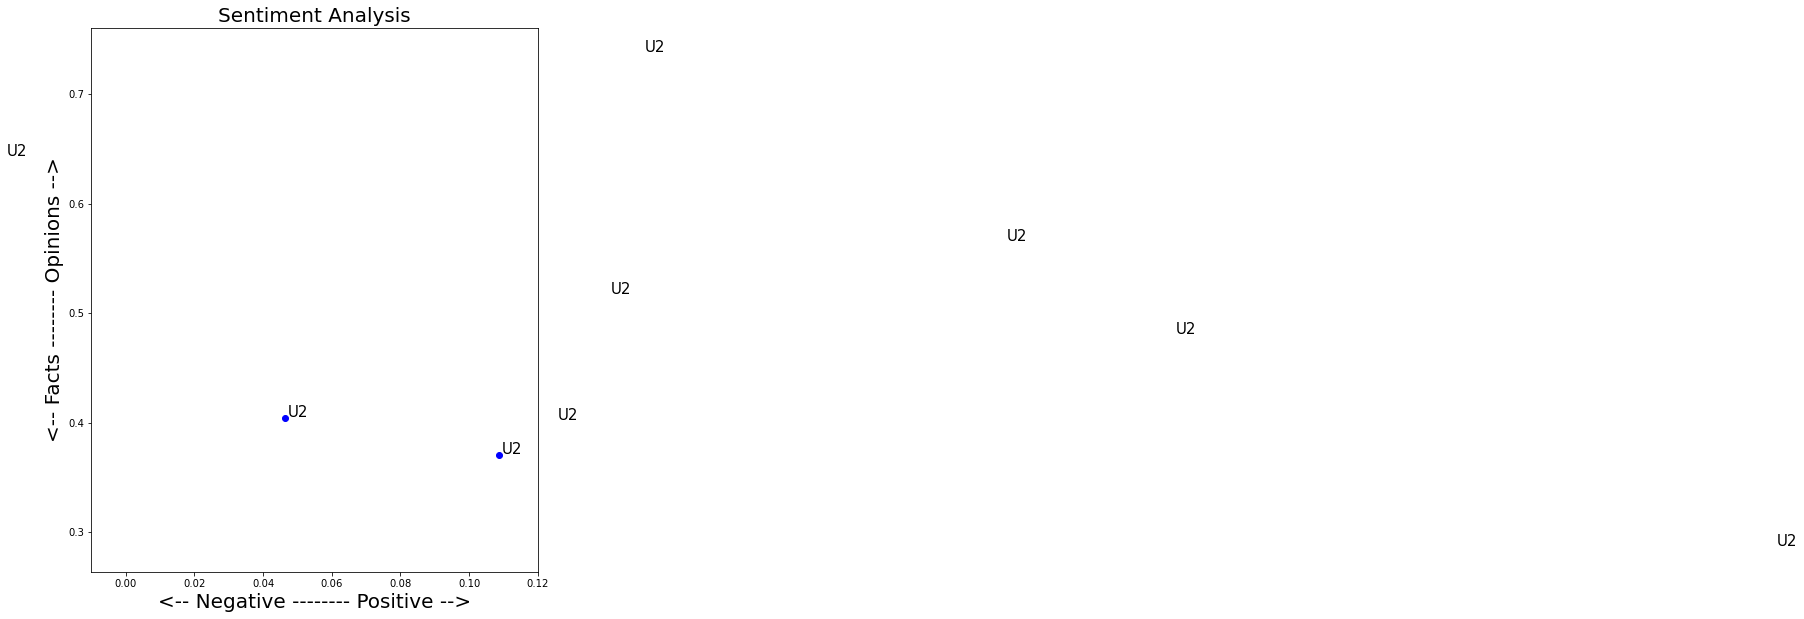

In [147]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 10]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['song'][index], fontsize=15)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=20)

plt.show()

In [148]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [149]:
data

,transcript,song,polarity,subjectivity
Bing Crosby,Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard position #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne minute to say good-bye\...,U2,0.140144,0.516962
Jonathan Cain,ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city boy\nBorn and raised in South Detroit\nH...,U2,0.124722,0.401944
Katharine McPhee,"Maybe it's much too early in the game\nOh, but I thought I'd ask you just the same\nWhat are you doing New Year's\nNew Year's eve?\n\nBaby, it's m...",U2,0.046306,0.404449
Katy Perry,Do you ever feel like a plastic bag\nDrifting thourgh the wind\nWanting to start again\nDo you ever feel feel so paper thin\nlike a house of cards...,U2,0.150000,0.737500
New Years Eve FX Sounds,"Yo, I've seen a lot of niggas\nSo when them niggas start talkin' reckless, I get offended, I get it\nThey try to keep an image, but look real clos...",U2,-0.035534,0.642576
Prince,"Don't worry, I won't hurt you\nI only want you to have some fun\nI was dreamin' when I wrote this\nForgive me if it goes astray\n\nBut when I woke...",U2,0.304797,0.480225
The Breeders,"we have come for LIGHT\nWHOLLY, we have come for light\nit's True\nI am the SUN\nI am the new year\nI am the rain\n\nI AM THE SUN\nI AM THE NEW YE...",U2,0.255682,0.564773
Three Dog Night,jeramiah was a bullfrog\nwas a good friend of mine\nnever understood a single word he said\nbut i helped him drink his wine\nand he always had mig...,U2,0.479908,0.286621
U2,"Yeah!\n\nAll is quiet on New Year's Day\nA world in white gets underway\nI want to be with you, be with you night and day\nNothing changes on New ...",U2,0.108577,0.370603


In [150]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Bing Crosby/Bob Crosby Orchestra\n\nPeaked Billboard positio',
  'n #18 in 1943\n\nOne minute to midnight\nOne minute to go\nOne',
  " minute to say good-bye\nBefore we say hello\n\nLet's start t",
  "he new year right\nTwelve o'clock tonight\nWhen they dim the",
  " light\nLet's begin\n\nKissing the old year out\nKissing the n",
  "ew year in\n\nLet's watch the old year die\nWith a fond good-",
  'bye\nAnd our hopes as high\nAs a kite\n\nHow can our love go w',
  "rong if\nWe start the new year right?\n\nLet's watch the old ",
  'year die\nWith a fond good-bye\nAnd our hopes as high\nAs a k',
  'ite\n\nHow can our love go wrong if\nWe start the new year ri'],
 ["ust a small town girl\nLivin' in a lonely world\nShe took the midnight train\nGoin' anywhere\nJust a city b",
  "oy\nBorn and raised in South Detroit\nHe took the midnight train\nGoin' anywhere\n\nA singer in a smokey roo",
  'm\nThe smell of wine and cheap perfume\nFor a smile they can share the night\nIt goes on and on, a

In [151]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript


[[0.0,
  0.0,
  0.0,
  0.174025974025974,
  0.25,
  0.39999999999999997,
  0.33,
  0.174025974025974,
  0.16,
  0.04545454545454545],
 [-0.175,
  0.0,
  0.35,
  -0.15555555555555559,
  -0.2916666666666667,
  0.65,
  0.0,
  -0.15555555555555559,
  0.0,
  0.0],
 [0.02878787878787879,
  0.02878787878787879,
  0.07402597402597401,
  -0.1875,
  0.13636363636363635,
  0.009090909090909094,
  0.174025974025974,
  -0.10909090909090909,
  -0.1875,
  0.13636363636363635],
 [0.0, 0.0, -0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0],
 [0.2,
  -0.11666666666666667,
  0.05833333333333333,
  -0.20000000000000004,
  0.12250000000000001,
  0.6,
  -0.34375,
  -0.26623376623376627,
  -0.24687499999999998,
  0.03333333333333333],
 [0.15,
  0.0,
  0.1,
  0.2,
  0.0,
  0.78125,
  0.78125,
  0.3571428571428571,
  -0.15555555555555559,
  0.2571428571428571],
 [0.4,
  0.4,
  0.35,
  0.13636363636363635,
  0.13636363636363635,
  0.0,
  0.0,
  0.13636363636363635,
  0.0,
  0.13636363636363635],
 [0.3142857142857143,
  

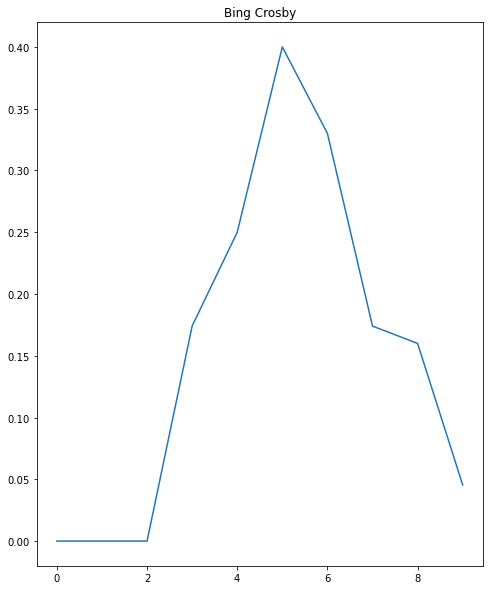

In [152]:
# Show the plot for one singer
plt.plot(polarity_transcript[0])
plt.title(data['song'].index[0])
plt.show()

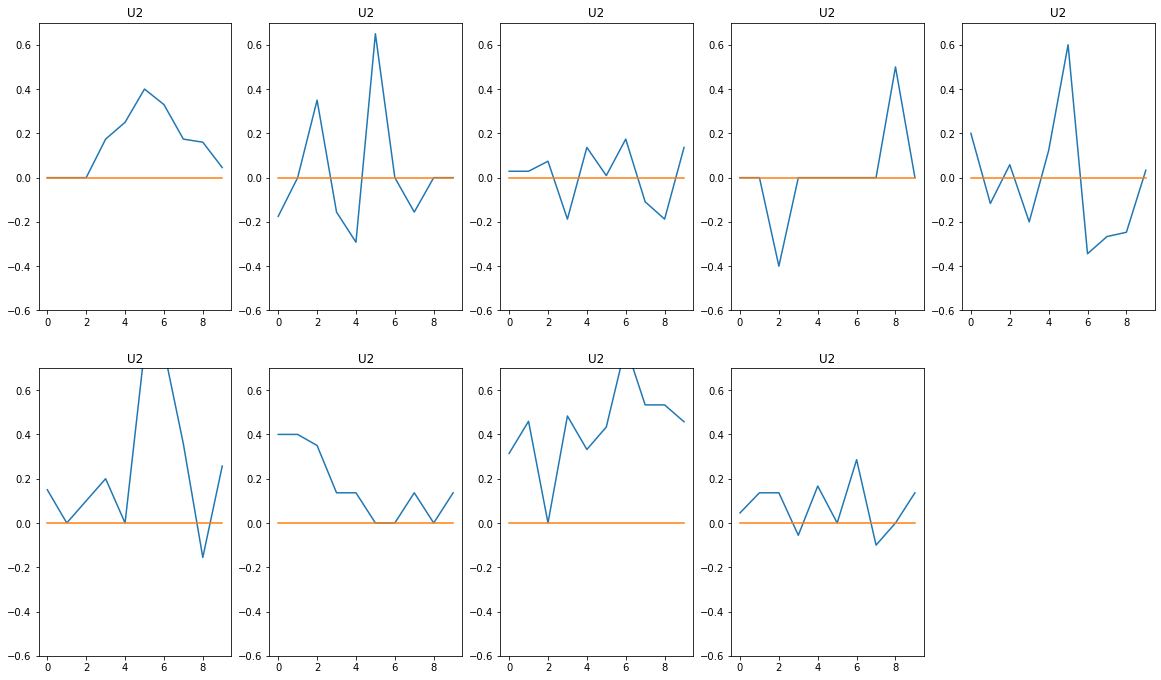

In [153]:
# Show the plot for all singers
plt.rcParams['figure.figsize'] = [20,18]

for index, singer in enumerate(data.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['song'][index])
    plt.ylim(ymin=-.6, ymax=.7)
    
plt.show()